# **Data Analyst or Data Scientist? Which is the best career you've to choose?**

Dalam beberapa tahun terakhir, industri data telah mengalami pertumbuhan yang sangat cepat. Semakin banyak perusahaan dari berbagai sektor bergantung pada analisis data untuk mendapatkan wawasan yang mendalam, memahami tren, dan mengambil keputusan yang lebih tepat. Dampak dari era digital ini telah menciptakan permintaan yang besar untuk profesional di bidang data science.

Banyak individu yang tertarik untuk memasuki industri data sering kali dihadapkan pada pertanyaan penting: apakah menjadi seorang Data Scientist atau Data Analyst akan menjadi pilihan karir yang lebih baik? Perbedaan esensial antara kedua peran ini, baik dalam tanggung jawab maupun kesempatan karir, sering kali menjadi pertimbangan krusial dalam memilih jalur karir yang sesuai.

Untuk menjawab pertanyaan ini, saya akan melakukan analsis kepada data survey kaggle 2022 yang dilakukan kepada praktisi data di seluruh dunia. Survei ini mencakup data terkait gaji, jenis pekerjaan (bidang data), gelar pendidikan yang dimiliki, tingkat pengalaman dalam coding dan pengalaman menggunakan machine learning, usia, serta variabel lain yang relevan.

Dalam mengeksplorasi perbandingan antara menjadi seorang Data Scientist atau Data Analyst, fokus diberikan pada gaji, gelar pendidikan, pengalaman dan keterampilan yang dibutuhkan. Analisis ini bertujuan untuk memberikan wawasan yang lebih jelas bagi individu yang tertarik memasuki atau memperluas karir di bidang data.

**Data Source:**
https://www.kaggle.com/competitions/kaggle-survey-2022/overview

**Reference:**
*  Data Science and MLOps Landscape in Industry:
https://www.kaggle.com/code/eraikako/data-science-and-mlops-landscape-in-industry
* Spending $$$ for MS in Data Science - Worth it ? :
https://www.kaggle.com/code/shivamb/spending-for-ms-in-data-science-worth-it/notebook

## **Data Preparation**
### Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os

### Read Data

In [ ]:
try:
    # Mengecek apakah folder 'data' sudah ada sebelumnya
    if not os.path.exists('data'):
        # Jika belum ada, maka membuat folder 'data'
        os.makedirs('data')

    # Mengunduh file CSV dari GitHub ke dalam folder 'data'
    url = 'https://raw.githubusercontent.com/syahrulazka/Data-Mining/main/kaggle_survey_2022_responses.csv'
    df = pd.read_csv(url)

except Exception as e:
    print(f"Error: {e}")

<ipython-input-211-c7798673dd8e>:9: DtypeWarning:

Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### Seleksi Variabel

In [ ]:
df = df[['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q11', 'Q16', 'Q23', 'Q24', 'Q25', 'Q27','Q29','Q30','Q43',    # basic question (14 question)
         'Q7_1', 'Q7_2','Q7_3','Q7_4','Q7_5','Q7_6','Q7_7',  # place first study ds
         'Q12_1', 'Q12_2','Q12_3','Q12_4','Q12_5','Q12_6','Q12_7','Q12_8','Q12_9','Q12_10','Q12_11','Q12_12','Q12_13','Q12_14','Q12_15',  # bahasa pemrograman
         'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6','Q17_7','Q17_8','Q17_9','Q17_10','Q17_11','Q17_12', 'Q17_13', 'Q17_14', 'Q17_15',  # ml library
         'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13', 'Q18_14', # ml algorithm
         'Q19_1','Q19_2','Q19_3','Q19_4','Q19_5','Q19_6','Q19_8', # cv tools
         'Q20_1','Q20_2','Q20_3','Q20_4','Q20_5', 'Q20_6',  # nlp method
         'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8',   # job activity
         ]]

### Merapihkan Nama Kolom

In [ ]:
# Menghapus baris dengan indeks 0
df = df.drop(0).reset_index(drop=True)

In [ ]:
df.head()

,Q2,Q3,Q4,Q5,Q8,Q11,Q16,Q23,Q24,Q25,...,Q20_5,Q20_6,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,Master’s degree,1-3 years,Under 1 year,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Bachelor’s degree,1-3 years,1-2 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55-59,Man,France,No,Some college/university study without earning ...,10-20 years,1-2 years,Data Scientist,Online Service/Internet-based Services,0-49 employees,...,NaN,NaN,NaN,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,NaN,NaN
4,45-49,Man,India,Yes,Bachelor’s degree,5-10 years,I do not use machine learning methods,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis (EDA)**

In [ ]:
ds_trend = df['Q23'].value_counts().reset_index()
ds_trend

,index,Q23
0,Data Scientist,1929
1,"Data Analyst (Business, Marketing, Financial, ...",1538
2,Currently not employed,1432
3,Software Engineer,980
4,Teacher / professor,833
5,"Manager (Program, Project, Operations, Executi...",832
6,Other,754
7,Research Scientist,593
8,Machine Learning/ MLops Engineer,571
9,Engineer (non-software),465


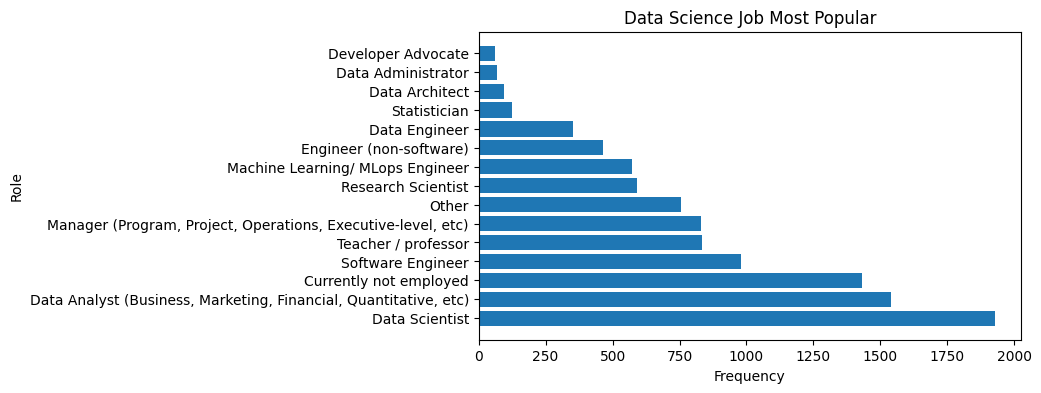

In [ ]:
plt.figure(figsize=(7, 4))
plt.barh(ds_trend['index'], ds_trend['Q23'])
plt.xlabel('Frequency')
plt.ylabel('Role')
plt.title('Data Science Job Most Popular')
plt.show()

Visualisasi tersebut menjadi alasan saya memilih topik data analyst atau data scientist.

## **Data Analyst vs Data Scientist**

In [ ]:
da = df[df['Q23'] == 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)'] # People with current role 'Data Analyst'
ds = df[df['Q23'] == 'Data Scientist']  # People with current role 'Data Scientist'

In [ ]:
print(da.shape)
print(ds.shape)

(1538, 86)
(1929, 86)


In [ ]:
da.head()

,Q2,Q3,Q4,Q5,Q8,Q11,Q16,Q23,Q24,Q25,...,Q20_5,Q20_6,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8
18,50-54,Man,Singapore,No,Doctoral degree,3-5 years,4-5 years,"Data Analyst (Business, Marketing, Financial, ...",Academics/Education,250-999 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN
20,30-34,Man,Taiwan,No,I prefer not to answer,< 1 years,Under 1 year,"Data Analyst (Business, Marketing, Financial, ...",Non-profit/Service,0-49 employees,...,NaN,NaN,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,30-34,Man,Turkey,No,Master’s degree,I have never written code,NaN,"Data Analyst (Business, Marketing, Financial, ...",Marketing/CRM,50-249 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,30-34,Man,India,No,Bachelor’s degree,3-5 years,I do not use machine learning methods,"Data Analyst (Business, Marketing, Financial, ...",Government/Public Service,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
75,25-29,Man,India,No,Master’s degree,1-3 years,1-2 years,"Data Analyst (Business, Marketing, Financial, ...",Insurance/Risk Assessment,"10,000 or more employees",...,NaN,NaN,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN,NaN,NaN,NaN,NaN,NaN


### Bagaimana perbandingan gaji Data Analyst dan Data Scientist?

In [ ]:
da['Q29'].value_counts()

$0-999              261
10,000-14,999       106
1,000-1,999         100
7,500-9,999          83
5,000-7,499          82
30,000-39,999        69
15,000-19,999        61
20,000-24,999        59
3,000-3,999          54
2,000-2,999          54
100,000-124,999      49
60,000-69,999        48
70,000-79,999        47
4,000-4,999          42
50,000-59,999        40
40,000-49,999        39
25,000-29,999        38
80,000-89,999        36
90,000-99,999        32
125,000-149,999      20
150,000-199,999      15
200,000-249,999       6
300,000-499,999       5
>$1,000,000           3
250,000-299,999       2
$500,000-999,999      2
Name: Q29, dtype: int64

In [ ]:
# Visualisasi menggunakan Plotly
fig = px.histogram(da, x='Q29',
                   title='Gaji Data Analyst',
                   labels={'Salary': 'Gaji'},
                   nbins=30)
fig.show()

In [ ]:
ds['Q29'].value_counts()

$0-999              164
40,000-49,999       118
150,000-199,999     112
100,000-124,999     111
10,000-14,999       101
30,000-39,999        98
50,000-59,999        94
1,000-1,999          90
125,000-149,999      89
60,000-69,999        71
20,000-24,999        66
25,000-29,999        66
200,000-249,999      61
70,000-79,999        59
80,000-89,999        56
5,000-7,499          56
15,000-19,999        53
7,500-9,999          44
4,000-4,999          40
2,000-2,999          38
90,000-99,999        37
3,000-3,999          34
250,000-299,999      21
300,000-499,999      15
>$1,000,000           7
$500,000-999,999      7
Name: Q29, dtype: int64

In [ ]:
# Visualisasi menggunakan Plotly
fig = px.histogram(ds, x='Q29',
                   title='Gaji Data Scientist',
                   labels={'Salary': 'Gaji'},
                   nbins=30)
fig.show()

<ipython-input-225-d36507475a43>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-225-d36507475a43>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



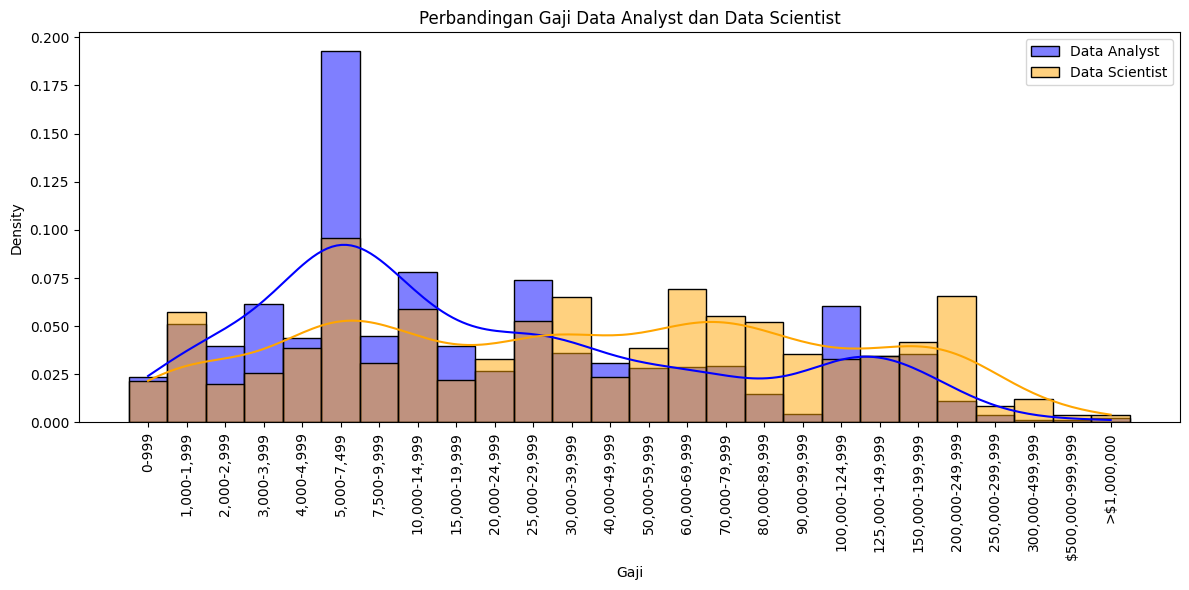

In [ ]:
# Mapping kategori gaji ke nama kategorinya
mapping = {
    '$0-999': '0-999', '1,000-1,999': '1,000-1,999', '2,000-2,999': '2,000-2,999',
    '3,000-3,999': '3,000-3,999', '4,000-4,999': '4,000-4,999', '5,000-7,499': '5,000-7,499',
    '7,500-9,999': '7,500-9,999', '10,000-14,999': '10,000-14,999', '15,000-19,999': '15,000-19,999',
    '20,000-24,999': '20,000-24,999', '25,000-29,999': '25,000-29,999', '30,000-39,999': '30,000-39,999',
    '40,000-49,999': '40,000-49,999', '50,000-59,999': '50,000-59,999', '60,000-69,999': '60,000-69,999',
    '70,000-79,999': '70,000-79,999', '80,000-89,999': '80,000-89,999', '90,000-99,999': '90,000-99,999',
    '100,000-124,999': '100,000-124,999', '125,000-149,999': '125,000-149,999',
    '150,000-199,999': '150,000-199,999', '200,000-249,999': '200,000-249,999',
    '250,000-299,999': '250,000-299,999', '300,000-499,999': '300,000-499,999',
    '$500,000-999,999': '$500,000-999,999', '>$1,000,000': '>$1,000,000'
}

# Urutkan kategori gaji berdasarkan mapping
da['Q29'] = da['Q29'].map(mapping)
ds['Q29'] = ds['Q29'].map(mapping)

# Urutkan kategori gaji berdasarkan urutan kategori
categories = list(mapping.values())

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=da, x='Q29', kde=True, stat='density', color='blue', label='Data Analyst', bins=len(categories))
sns.histplot(data=ds, x='Q29', kde=True, stat='density', color='orange', label='Data Scientist', bins=len(categories))

plt.xlabel('Gaji')
plt.ylabel('Density')
plt.title('Perbandingan Gaji Data Analyst dan Data Scientist')
plt.legend()
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=90)
plt.tight_layout()
plt.show()

Secara keseluruhan kita bisa lihat bahwa persebaran gaji data scintist lebih bemkumpul di kategori gaji besar (USD 50,000 ke atas), dan untuk kategori gaji yang lebih kecil di dominasi oleh data analyst (kurang dari USD 30,000). ini menandakan bahwa secara umum gaji data scintist memiliki rate yang lebih besar di banding data analyst terlepas dari faktor-faktor lainnya.

## Bagaimana dengan pekerjaan sehari harinya antara Data Analyst dan Data Scientist?

                             Data Scientist Activity  Frequency
0  Analyze and understand data to influence produ...       1356
1  Build and/or run the data infrastructure that ...        734
2  Build prototypes to explore applying machine l...       1104
3  Build and/or run a machine learning service th...        836
4  Experimentation and iteration to improve exist...        942
5  Do research that advances the state of the art...        445
6  None of these activities are an important part...         57
7                                              Other         70


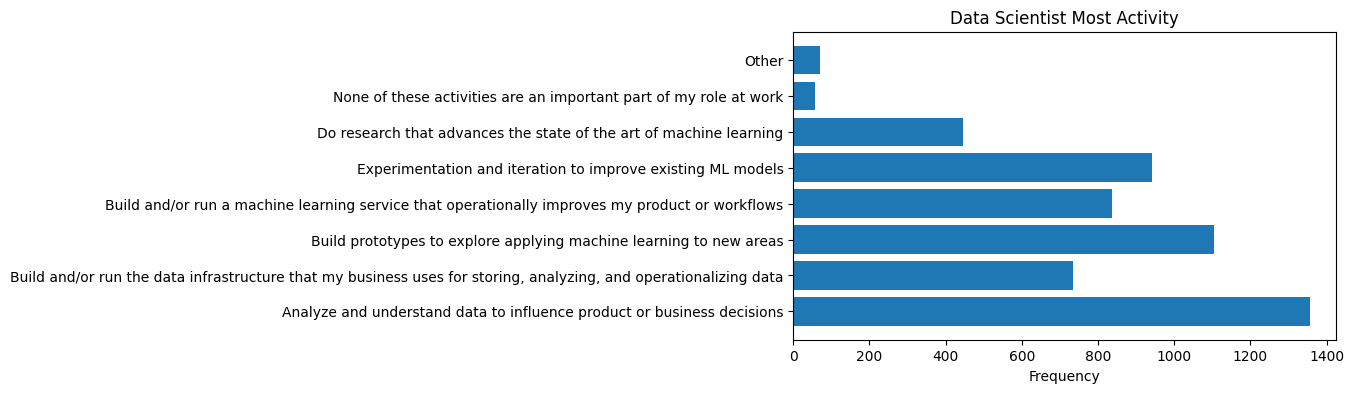

In [ ]:
ds_jobs = ds.iloc[:, 78:86].notnull().sum()
# Membuat DataFrame baru dari hasil perhitungan
ds_job = pd.DataFrame({'Data Scientist Activity': ds.columns[78:86], 'Frequency': ds_jobs})

ds_job = ds_job.reset_index()
ds_job = ds_job.drop(['index'], axis=1)

# List job_activities baru
job_activities = [
    'Analyze and understand data to influence product or business decisions',
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data',
    'Build prototypes to explore applying machine learning to new areas',
    'Build and/or run a machine learning service that operationally improves my product or workflows',
    'Experimentation and iteration to improve existing ML models',
    'Do research that advances the state of the art of machine learning',
    'None of these activities are an important part of my role at work',
    'Other'
]

# Mapping nilai kolom dengan job_activities
activity_mapping = {old: new for old, new in zip(ds_job['Data Scientist Activity'], job_activities)}

# Mengganti nilai dalam kolom 'Data Scientist Activity' dengan job_activities
ds_job['Data Scientist Activity'] = ds_job['Data Scientist Activity'].map(activity_mapping)

# Menampilkan DataFrame baru
print(ds_job)

plt.figure(figsize=(7, 4))
plt.barh(ds_job['Data Scientist Activity'], ds_job['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('Data Scientist Most Activity')
plt.show()

                               Data Analyst Activity  Frequency
0  Analyze and understand data to influence produ...       1173
1  Build and/or run the data infrastructure that ...        472
2  Build prototypes to explore applying machine l...        252
3  Build and/or run a machine learning service th...        175
4  Experimentation and iteration to improve exist...        146
5  Do research that advances the state of the art...        138
6  None of these activities are an important part...        110
7                                              Other         72


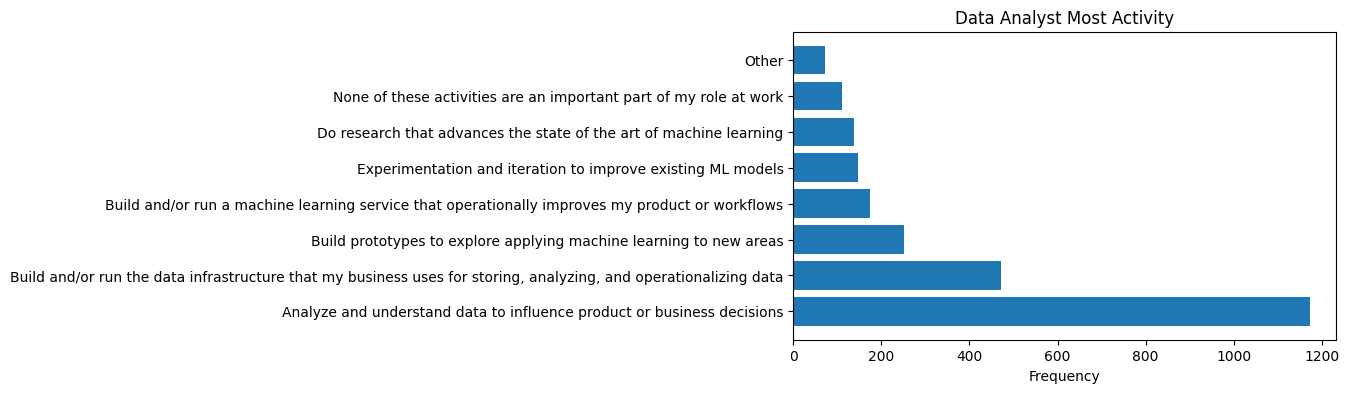

In [ ]:
da_jobs = da.iloc[:, 78:86].notnull().sum()
# Membuat DataFrame baru dari hasil perhitungan
da_job = pd.DataFrame({'Data Analyst Activity': da.columns[78:86], 'Frequency': da_jobs})

da_job = da_job.reset_index()
da_job = da_job.drop(['index'], axis=1)

# Mapping nilai kolom dengan job_activities
activity_mapping = {old: new for old, new in zip(da_job['Data Analyst Activity'], job_activities)}

# Mengganti nilai dalam kolom 'Data Analyst Activity' dengan job_activities
da_job['Data Analyst Activity'] = da_job['Data Analyst Activity'].map(activity_mapping)

# Menampilkan DataFrame baru
print(da_job)

plt.figure(figsize=(7, 4))
plt.barh(da_job['Data Analyst Activity'], da_job['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('Data Analyst Most Activity')
plt.show()

Dari aktivitas sehari-harinya, Data Analyst maupun Data Scientist keduanya banyak melakukan analisis data untuk influence product atau keputusan bisnis. Tetapi data scientist tidak sampai disana saja, mereka juga sudah berfokus ke pembuatan model machine learning, seperti Build prototypes to explore applying ML dan Experimentation and iteration to improve existing ML models. Pada, intinya Data analyst lebih berfokus ke analisis data untuk keputusan bisnisnya dan tidak menggunakan machine learning begitu dalam, lain halnya dengan data scientist yang sering mengaplikasikan machine learning terhadap permasalahan bisnisnya.

## Apakah untuk menjadi Data Analyst atau Data Scientist membutuhkan pengalaman coding atau pengalaman menggunakan machine learning?

In [ ]:
# Menghitung persentase frekuensi pengalaman coding untuk Data Analyst
da_percentages = (da['Q11'].value_counts(normalize=True) * 100).reset_index()
da_percentages.columns = ['Pengalaman Coding', 'Persentase']

# Plot pie chart untuk Data Analyst
fig_da = px.pie(da_percentages, values='Persentase', names='Pengalaman Coding', title='Persentase Pengalaman Coding Data Analyst')
fig_da.show()

# Menghitung persentase frekuensi gelar untuk Data Scientist
ds_percentages = (ds['Q11'].value_counts(normalize=True) * 100).reset_index()
ds_percentages.columns = ['Pengalaman Coding', 'Persentase']

# Plot pie chart untuk Data Scientist
fig_ds = px.pie(ds_percentages, values='Persentase', names='Pengalaman Coding', title='Persentase Pengalaman Coding Data Scientist')
fig_ds.show()

* 52.4% data analyst dari responden. punya pengalaman coding di bawah 3 tahun. Lalu 26.9% data analis punya pengalaman coding kurang dari 1 tahun. 12% data analyst tidak pernah menulis code. Dan hanya kurang dari 20% dari responden yang sedang bekerja sebagai data analyst memiliki pengalaman coding di atas 5 tahun.
* Sedangkan Data Scientist, hampir 50% dari respondennya punya pengalaman menulis code lebih dari 5 tahun. Dan hanya 2.38% respondennya tidak pernah menulis code.

## Apakah data analyst harus punya pengalaman menggunakan machine learning?

In [ ]:
# Menghitung persentase frekuensi pengalaman coding untuk Data Analyst
da_percentages = (da['Q16'].value_counts(normalize=True) * 100).reset_index()
da_percentages.columns = ['Pengalaman Menggunakan Machine Learning', 'Persentase']

# Plot pie chart untuk Data Analyst
fig_da = px.pie(da_percentages, values='Persentase', names='Pengalaman Menggunakan Machine Learning', title='Persentase Pengalaman Menggunakan Machine Learning Data Analyst')
fig_da.show()

# Menghitung persentase frekuensi gelar untuk Data Scientist
ds_percentages = (ds['Q16'].value_counts(normalize=True) * 100).reset_index()
ds_percentages.columns = ['Pengalaman Menggunakan Machine Learning', 'Persentase']

# Plot pie chart untuk Data Scientist
fig_ds = px.pie(ds_percentages, values='Persentase', names='Pengalaman Menggunakan Machine Learning', title='Persentase Pengalaman Menggunakan Machine Learning Data Scientist')
fig_ds.show()

* 26.2% responden data analyst tidak pernah menggunakan machine learning dalam permasalahan bisnisnya. Mayoritas data analyst atau sekitar 34.7% hanya memiliki pengalaman menggunakan machine learning di bawah satu tahun. Dan hampir 80% data analyst dalam responden hanya memiliki pengalaman di bawah 2 tahun.
* 50% dari data scientist memiliki pengalaman menggunakan machine learning di atas 5 tahun.

### Algortima Machine Learning apa yang dipakai oleh Data Analyst atau Data Scientist?

                                      Data Analyst ML  Frequency
0                       Linear or Logistic Regression        751
1                    Decision Trees or Random Forests        597
2   Gradient Boosting Machines (xgboost, lightgbm,...        324
3                                 Bayesian Approaches        172
4                             Evolutionary Approaches         27
5                   Dense Neural Networks (MLPs, etc)        105
6                       Convolutional Neural Networks        194
7                     Generative Adversarial Networks         32
8                           Recurrent Neural Networks        116
9             Transformer Networks (BERT, gpt-3, etc)         72
10               Autoencoder Networks (DAE, VAE, etc)         22
11                              Graph Neural Networks         59
12                                               None        120
13                                              Other         30


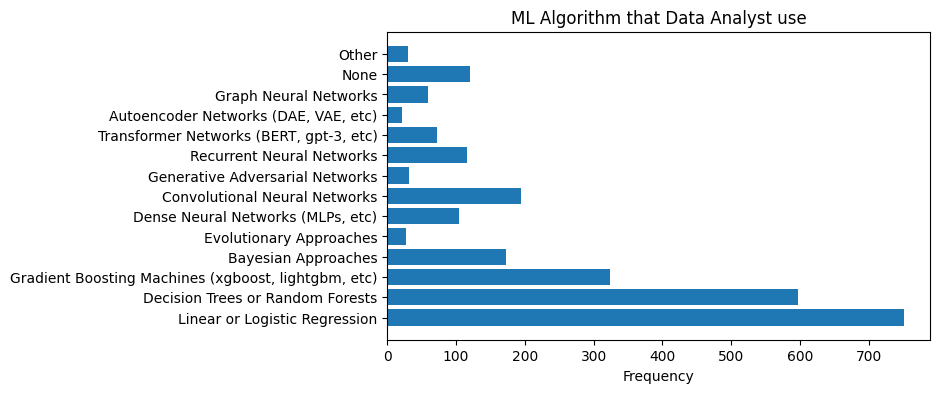

In [ ]:
da_ml_algo = da.iloc[:, 51:65].notnull().sum()
# Membuat DataFrame baru dari hasil perhitungan
da_ml_aproach = pd.DataFrame({'Data Analyst ML': da.columns[51:65], 'Frequency': da_ml_algo})

da_ml_aproach = da_ml_aproach.reset_index()
da_ml_aproach = da_ml_aproach.drop(['index'], axis=1)

ml_approaches = [
    'Linear or Logistic Regression',
    'Decision Trees or Random Forests',
    'Gradient Boosting Machines (xgboost, lightgbm, etc)',
    'Bayesian Approaches',
    'Evolutionary Approaches',
    'Dense Neural Networks (MLPs, etc)',
    'Convolutional Neural Networks',
    'Generative Adversarial Networks',
    'Recurrent Neural Networks',
    'Transformer Networks (BERT, gpt-3, etc)',
    'Autoencoder Networks (DAE, VAE, etc)',
    'Graph Neural Networks',
    'None',
    'Other'
]

# Mapping nilai kolom dengan job_activities
activity_mapping = {old: new for old, new in zip(da_ml_aproach['Data Analyst ML'], ml_approaches)}

# Mengganti nilai dalam kolom 'Data Analyst ML' dengan job_activities
da_ml_aproach['Data Analyst ML'] = da_ml_aproach['Data Analyst ML'].map(activity_mapping)

# Menampilkan DataFrame baru
print(da_ml_aproach)

plt.figure(figsize=(7, 4))
plt.barh(da_ml_aproach['Data Analyst ML'], da_ml_aproach['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('ML Algorithm that Data Analyst use')
plt.show()

                                    Data Scientist ML  Frequency
0                       Linear or Logistic Regression       1465
1                    Decision Trees or Random Forests       1376
2   Gradient Boosting Machines (xgboost, lightgbm,...       1144
3                                 Bayesian Approaches        517
4                             Evolutionary Approaches        106
5                   Dense Neural Networks (MLPs, etc)        488
6                       Convolutional Neural Networks        671
7                     Generative Adversarial Networks        121
8                           Recurrent Neural Networks        465
9             Transformer Networks (BERT, gpt-3, etc)        416
10               Autoencoder Networks (DAE, VAE, etc)        196
11                              Graph Neural Networks        159
12                                               None         37
13                                              Other         55


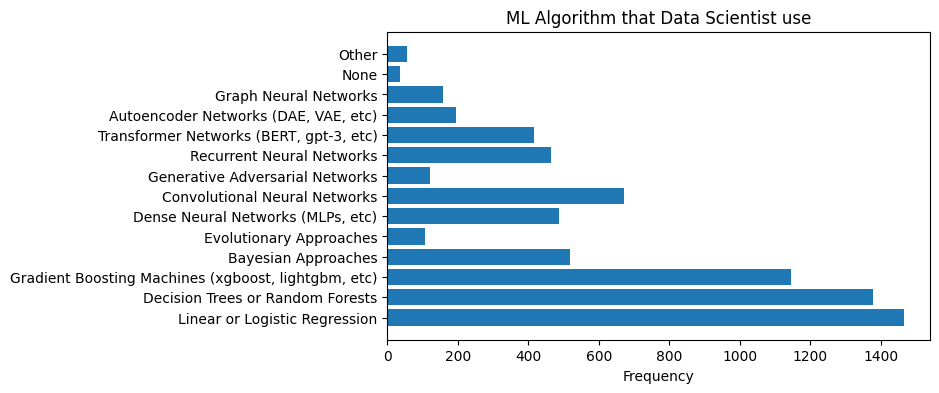

In [ ]:
ds_ml_algo = ds.iloc[:, 51:65].notnull().sum()
# Membuat DataFrame baru dari hasil perhitungan
ds_ml_aproach = pd.DataFrame({'Data Scientist ML': da.columns[51:65], 'Frequency': ds_ml_algo})

ds_ml_aproach = ds_ml_aproach.reset_index()
ds_ml_aproach = ds_ml_aproach.drop(['index'], axis=1)

# Mapping nilai kolom dengan job_activities
activity_mapping = {old: new for old, new in zip(ds_ml_aproach['Data Scientist ML'], ml_approaches)}

# Mengganti nilai dalam kolom 'Data Scientist ML' dengan job_activities
ds_ml_aproach['Data Scientist ML'] = ds_ml_aproach['Data Scientist ML'].map(activity_mapping)

# Menampilkan DataFrame baru
print(ds_ml_aproach)

plt.figure(figsize=(7, 4))
plt.barh(ds_ml_aproach['Data Scientist ML'], ds_ml_aproach['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('')
plt.title('ML Algorithm that Data Scientist use')
plt.show()

* Sebagian data analyst menggunakan machine learning algorithm untuk kebutuhan bisnisnya. Beberapa machine learning yang biasa digunakan oleh data analyst seperti Linear atau Logistic Regression dan Decision Tree atau Random Forest.
* Sedangkan Data Scientist, sudah menggunakan teknik machine learning yang cukup advance dibanding data analyst, seperti Gradient Boosting, Neural Network (CNN dan RNN), dan algoritma baru seperti Transformer.

## Apakah gelar universitas diperlukan untuk menjadi seorang data analyst atau data scientist?

In [ ]:
# Menghitung persentase frekuensi gelar untuk Data Analyst
da_percentages = (da['Q8'].value_counts(normalize=True) * 100).reset_index()
da_percentages.columns = ['Gelar', 'Persentase']

# Plot pie chart untuk Data Analyst
fig_da = px.pie(da_percentages, values='Persentase', names='Gelar', title='Persentase Gelar Data Analyst')
fig_da.show()

# Menghitung persentase frekuensi gelar untuk Data Scientist
ds_percentages = (ds['Q8'].value_counts(normalize=True) * 100).reset_index()
ds_percentages.columns = ['Gelar', 'Persentase']

# Plot pie chart untuk Data Scientist
fig_ds = px.pie(ds_percentages, values='Persentase', names='Gelar', title='Persentase Gelar Data Scientist')
fig_ds.show()

* 80.1% Data Analyst mempunyai gelar resmi universitas (S1 atau S2)
* 88.5% Data Scientist mempunyai gelar (S1, S2, atau S3)

Dari visualisasi kita bisa lihat responden yang bekerja sebagai data analyst maupun data scientist memilih untuk mempunyai gelar resmi universitas seperti S1, S2, atau S3

# **Interpretasi**

## **Insight:**

1. **Perbedaan Gaji:**
    - Data Scientist memiliki gaji cenderung lebih tinggi, terutama di atas USD 50,000, sementara Data Analyst mendominasi kategori gaji di bawah USD 30,000.
    - Gaji Data Scientist secara umum lebih besar dibandingkan Data Analyst, menyoroti pertimbangan penting terkait gaji dalam memilih karir di bidang data.

2. **Perbedaan Peran:**
    - Data Analyst fokus pada analisis data untuk keputusan bisnis, sementara Data Scientist terlibat dalam pengembangan model machine learning yang lebih canggih untuk permasalahan yang kompleks.
    - Perbedaan utama terletak pada kedalaman keterlibatan dalam penerapan teknik machine learning untuk mendukung keputusan bisnis.

3. **Pengalaman Coding dan Machine Learning:**
    - Mayoritas Data Analyst memiliki pengalaman coding di bawah 3 tahun, sementara hampir setengah dari Data Scientist memiliki pengalaman lebih dari 5 tahun dalam coding.
    - Data Analyst cenderung memiliki pengalaman yang lebih terbatas dalam penggunaan machine learning dibandingkan dengan Data Scientist.

4. **Teknik Machine Learning yang Digunakan:**
    - Data Analyst umumnya menggunakan algoritma sederhana seperti Linear Regression, Logistic Regression, Decision Tree, atau Random Forest.
    - Di sisi lain, Data Scientist lebih cenderung menggunakan teknik canggih seperti Gradient Boosting, Neural Network (CNN dan RNN), serta algoritma baru seperti Transformer.

5. **Pendidikan Formal:**
    - Baik Data Analyst (sekitar 80.1%) maupun Data Scientist (sekitar 88.5%) mayoritas memiliki gelar universitas dari tingkat S1 hingga S3.
    - Ini menunjukkan pentingnya pendidikan formal dalam bidang data, di mana sebagian besar profesional dalam kedua peran ini menyelesaikan pendidikan formal hingga tingkat universitas.

## **Kesimpulan:**

Analisis dari data survei Kaggle 2022 menunjukkan perbedaan yang signifikan antara Data Scientist dan Data Analyst. Gaji Data Scientist cenderung lebih tinggi dengan kebanyakan berada di kategori gaji yang lebih tinggi daripada Data Analyst. Selain gaji, perbedaan utama terletak pada kedalaman teknis, di mana Data Scientist lebih terlibat dalam pengembangan model machine learning yang canggih. Mereka memiliki pengalaman coding dan penggunaan machine learning yang lebih luas dibandingkan Data Analyst. Meski keduanya membutuhkan gelar universitas, peran sebagai Data Scientist menuntut pemahaman yang lebih mendalam terhadap teknologi dan algoritma terkini. Sebagai kesimpulan, pilihan karir antara Data Analyst dan Data Scientist sangat tergantung pada minat, tujuan, dan kedalaman teknis yang diinginkan. Jika tertarik pada analisis data untuk keputusan bisnis, Data Analyst cocok, sementara untuk keterlibatan dalam pengembangan model canggih, Data Scientist menjadi pilihan yang lebih tepat.

# **K Means Clustering**

In [ ]:
# import library sklearn untuk kmeans
from sklearn.cluster import KMeans

In [ ]:
# memilih kolom yang ingin dimasukkan ke dalam k means
da2 = da.copy()
da2 = da2.iloc[:, :12]

ds2 = ds.copy()
ds2 = ds2.iloc[:, :12]

In [ ]:
# Melakukan one-hot encoding pada kolom kategorikal dalam DataFrame
da_encoded = pd.get_dummies(da2)
ds_encoded = pd.get_dummies(ds2)

## K Means untuk Orang yang bekerja sebagai Data Analyst

In [ ]:
wcss = [] # WCSS: Within-Cluster Sum of Squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(da_encoded)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

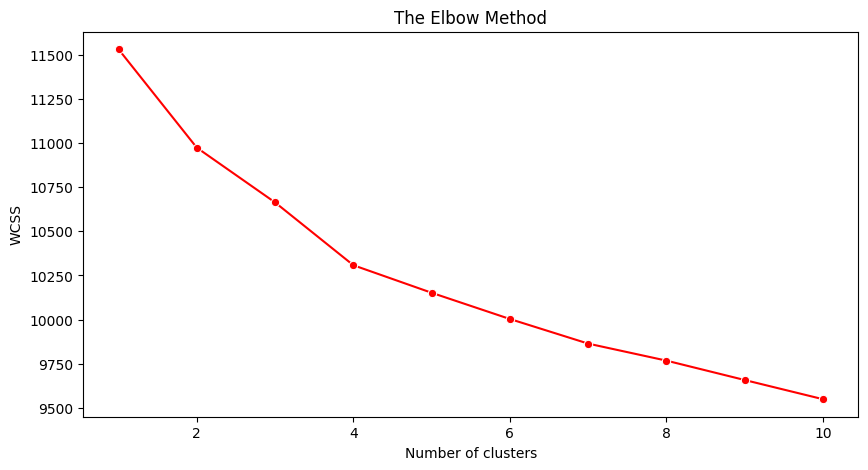

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(da_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
y_kmeans

array([1, 2, 3, ..., 0, 1, 1], dtype=int32)

### Hasil atau Output Analisis Clustering K-Means

In [ ]:
result_da = pd.concat([da2, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
result_da.head()

,Q2,Q3,Q4,Q5,Q8,Q11,Q16,Q23,Q24,Q25,Q27,Q29,Cluster
18,50-54,Man,Singapore,No,Doctoral degree,3-5 years,4-5 years,"Data Analyst (Business, Marketing, Financial, ...",Academics/Education,250-999 employees,We are exploring ML methods (and may one day p...,"90,000-99,999",3.0
20,30-34,Man,Taiwan,No,I prefer not to answer,< 1 years,Under 1 year,"Data Analyst (Business, Marketing, Financial, ...",Non-profit/Service,0-49 employees,We are exploring ML methods (and may one day p...,"30,000-39,999",0.0
58,30-34,Man,Turkey,No,Master’s degree,I have never written code,NaN,"Data Analyst (Business, Marketing, Financial, ...",Marketing/CRM,50-249 employees,We are exploring ML methods (and may one day p...,NaN,1.0
74,30-34,Man,India,No,Bachelor’s degree,3-5 years,I do not use machine learning methods,"Data Analyst (Business, Marketing, Financial, ...",Government/Public Service,"10,000 or more employees",We use ML methods for generating insights (but...,"3,000-3,999",3.0
75,25-29,Man,India,No,Master’s degree,1-3 years,1-2 years,"Data Analyst (Business, Marketing, Financial, ...",Insurance/Risk Assessment,"10,000 or more employees",I do not know,"7,500-9,999",3.0


## K Means untuk Orang yang bekerja sebagai Data Scientist

In [ ]:
wcss = [] # WCSS: Within-Cluster Sum of Squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(ds_encoded)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

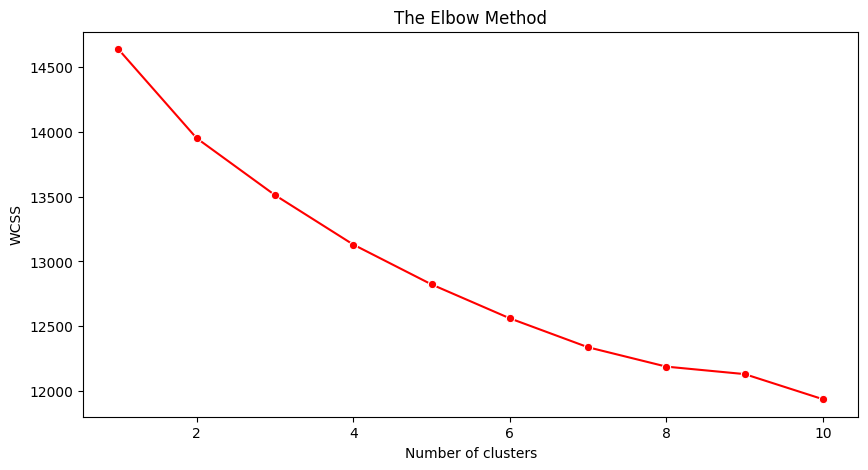

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(da_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Hasil atau Output Analisis Clustering K-Means

In [ ]:
result_ds = pd.concat([ds2, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
result_ds.head()

,Q2,Q3,Q4,Q5,Q8,Q11,Q16,Q23,Q24,Q25,Q27,Q29,Cluster
3,55-59,Man,France,No,Some college/university study without earning ...,10-20 years,1-2 years,Data Scientist,Online Service/Internet-based Services,0-49 employees,"We recently started using ML methods (i.e., mo...","25,000-29,999",4.0
16,40-44,Man,United States of America,No,Master’s degree,10-20 years,5-10 years,Data Scientist,Computers/Technology,"1000-9,999 employees","We have well established ML methods (i.e., mod...","200,000-249,999",3.0
17,30-34,Man,United States of America,No,Master’s degree,5-10 years,2-3 years,Data Scientist,Accounting/Finance,50-249 employees,We are exploring ML methods (and may one day p...,"150,000-199,999",0.0
29,35-39,Man,Chile,No,Bachelor’s degree,5-10 years,4-5 years,Data Scientist,Marketing/CRM,"1000-9,999 employees","We recently started using ML methods (i.e., mo...","50,000-59,999",2.0
35,25-29,Man,Japan,No,Master’s degree,3-5 years,2-3 years,Data Scientist,Computers/Technology,"1000-9,999 employees","We recently started using ML methods (i.e., mo...","50,000-59,999",2.0
